# Severe Weather Analysis and Forecasting with Python Tools
David John Gagne, National Center for Atmospheric Research

## Outline
1. Severe Weather Analysis
    1. Surface Analysis
    2. Upper Air Analysis
    3. Sounding Data
2. Severe Weather Forecasting
    1. NCAR Ensemble Forecast Analysis
    2. NCAR Ensemble Storm Patches
3. Severe Weather Verification
    1. Verifying the NCAR Ensemble Forecast

In [65]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from mpl_toolkits.basemap import Basemap

In [58]:
d = xr.open_dataset("http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/HRRR/CONUS_3km/wrfprs/HRRR_CONUS_3km_wrfprs_201703130000.grib2")

In [68]:
d["Temperature_isobaric"].dims

('time', 'isobaric', 'y', 'x')

In [71]:
np.where(d["isobaric"] == 50000)

(array([18]),)

<IPython.core.display.Javascript object>


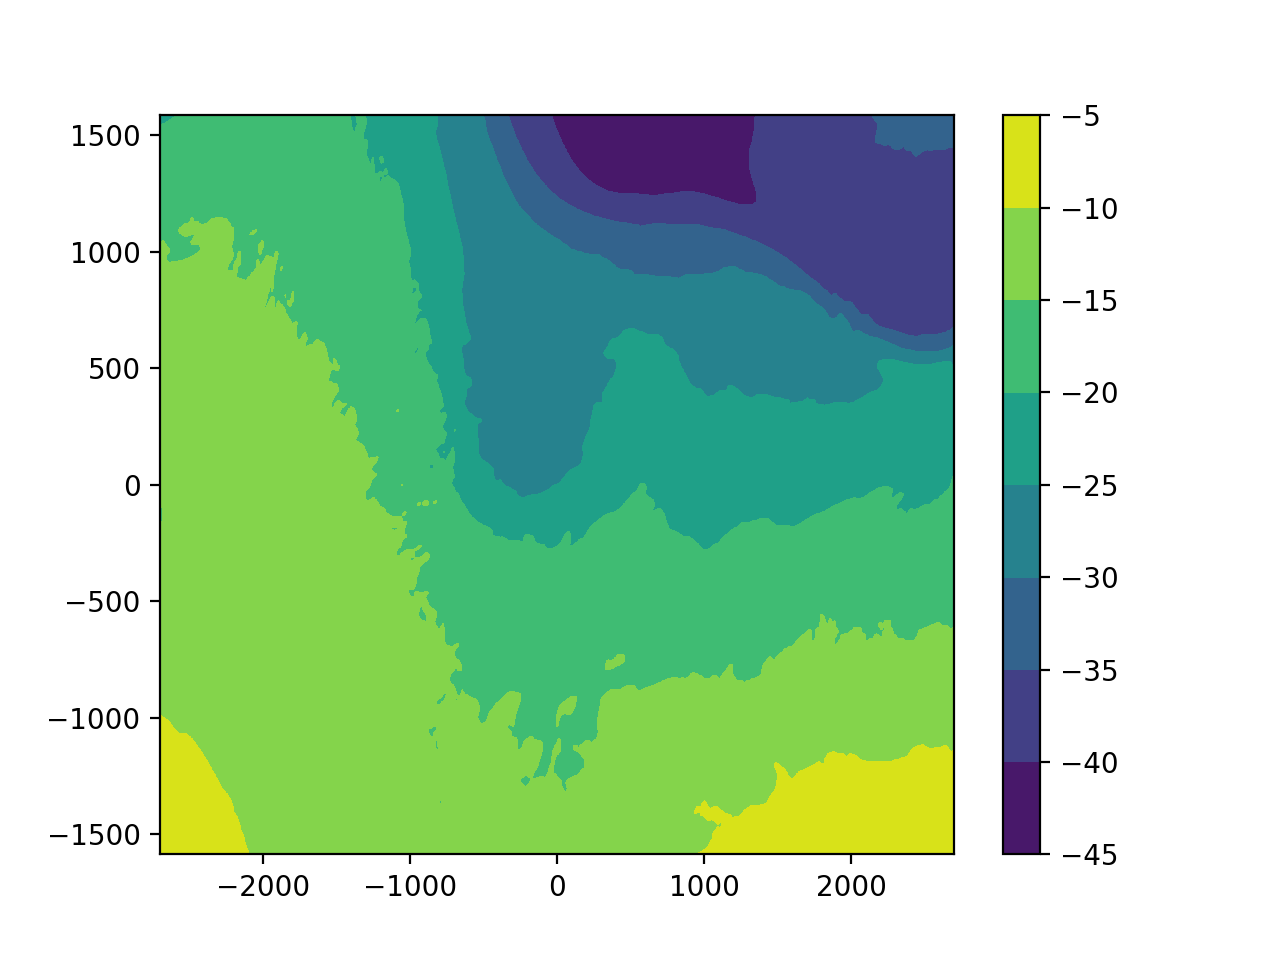

In [73]:
plt.contourf(d.x, d.y, d['Temperature_isobaric'][5, 18] - 273)
plt.colorbar()

In [75]:
d["x"]

<xarray.DataArray 'x' (x: 1799)>
array([-2697.52002, -2694.52002, -2691.52002, ...,  2690.47998,  2693.47998,
        2696.47998], dtype=float32)
Coordinates:
  * x        (x) float32 -2697.52 -2694.52 -2691.52 -2688.52 -2685.52 ...
    reftime  datetime64[ns] ...
Attributes:
    standard_name: projection_x_coordinate
    units: km
    _CoordinateAxisType: GeoX

In [77]:
bmap = Basemap(projection="lcc", resolution="l", lon_0=-97.5, lat_0=38.5, lat_1=38.5, lat_2=38.5, rsphere=6371229, 
               width=np.ptp(d["x"].values) * 1000, height=np.ptp(d["y"].values) * 1000)

<IPython.core.display.Javascript object>


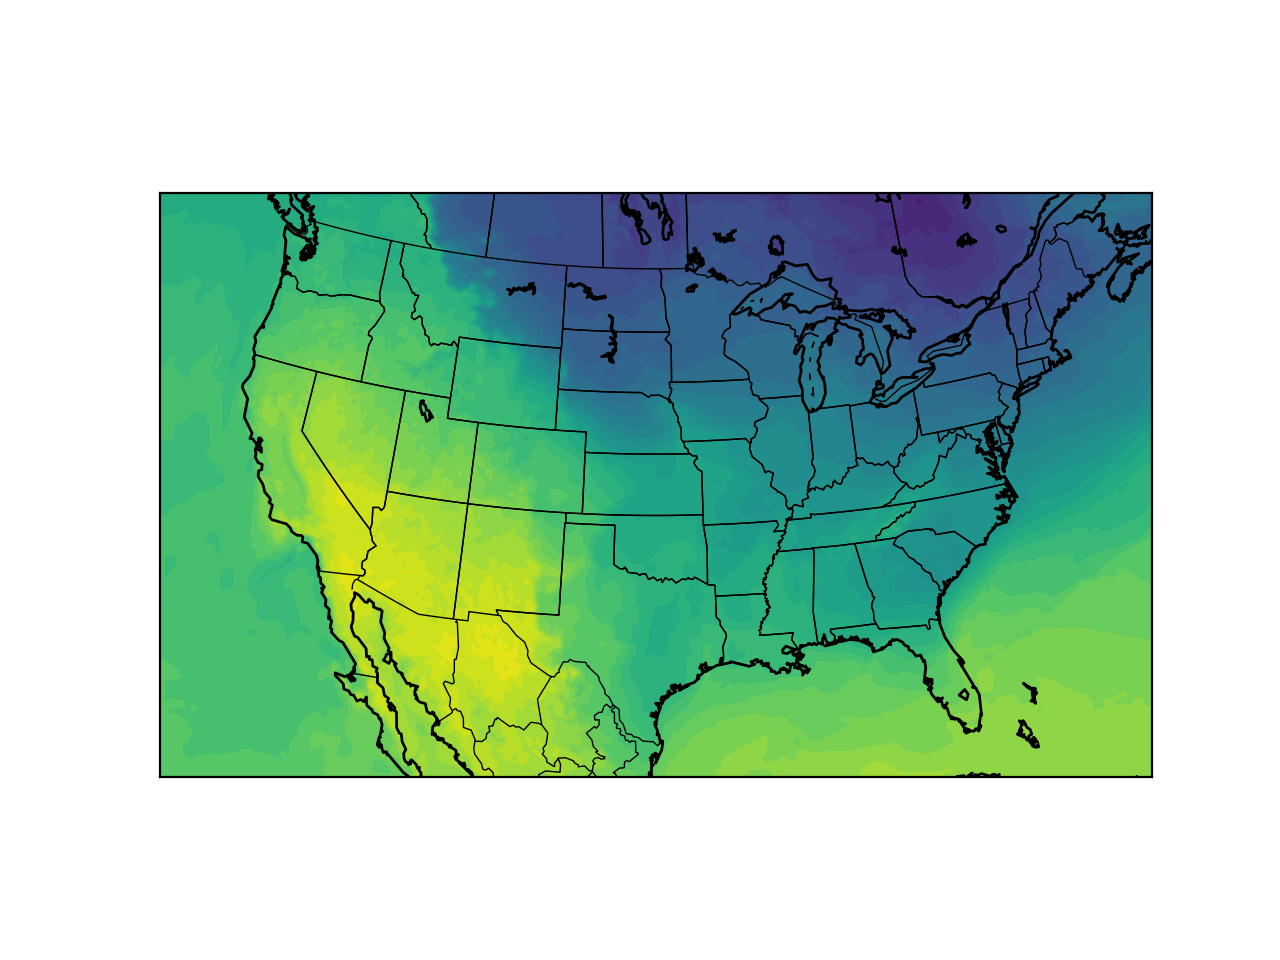

In [79]:
bmap.drawstates()
bmap.drawcountries()
bmap.drawcoastlines()
plt.contourf((d["x"] - d["x"].min()) * 1000, (d["y"] - d["y"].min()) * 1000, d['Temperature_isobaric'][5, -2] - 273, np.arange(-30, 35, 2))

In [55]:
d["Temperature_height_above_ground"].shape

(19, 1, 1377, 2145)

In [57]:
d.close()